In [30]:
from google.colab import files
uploaded = files.upload()


Saving loan.csv to loan (2).csv


In [31]:
# ----------------------------
# Step 1: Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [32]:


# Step 2: Load the Dataset
# ----------------------------
df = pd.read_csv("loan.csv")  # Make sure the file is in the same folder


In [33]:
# Step 3: Preprocessing
# ----------------------------
df = df.drop(columns=["Loan_ID"])  # Drop ID column

# Handle missing values
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Label Encoding for categorical features
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

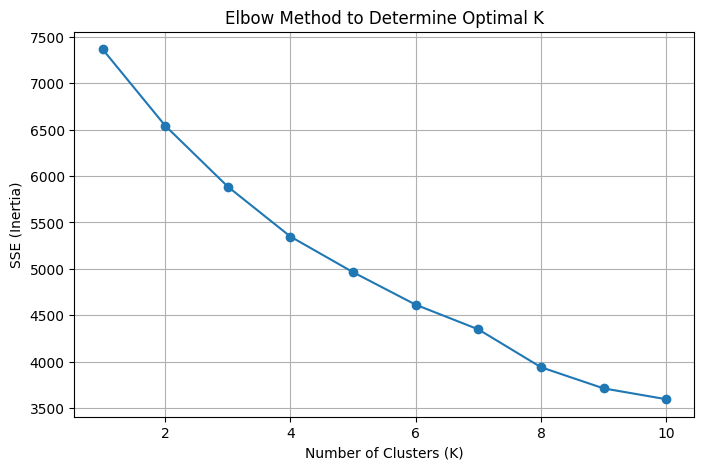

In [35]:
# Step 4: Elbow Method to find optimal K
# ----------------------------
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, sse, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

In [36]:
# Step 5: K-Means Clustering (K=3)
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(scaled_data)


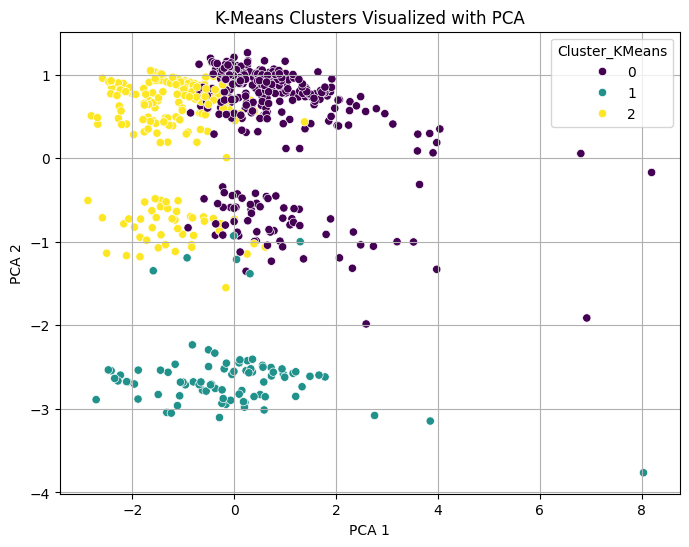

In [37]:
# ----------------------------
# Step 6: Visualize Clusters using PCA
# ----------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster_KMeans'], palette='viridis')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


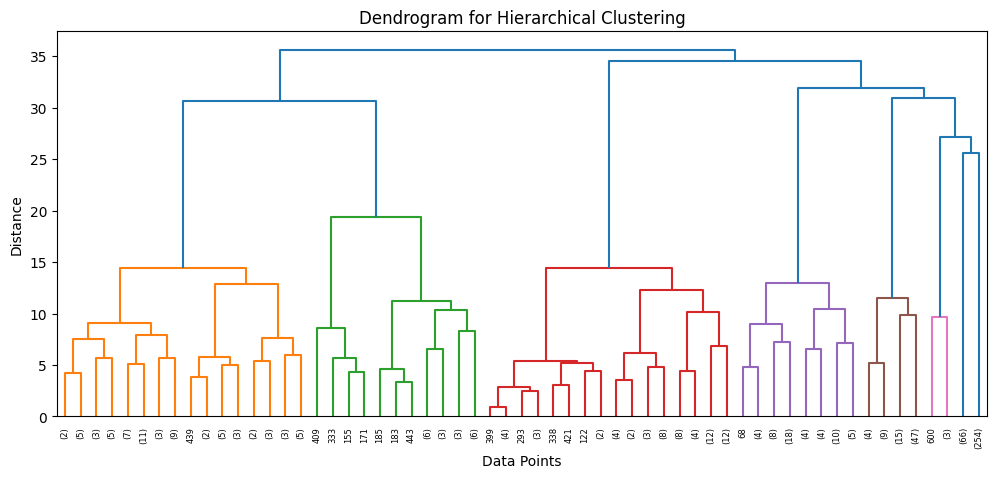

In [38]:

# ----------------------------
# Step 7: Hierarchical Clustering
# ----------------------------
linkage_matrix = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Assign cluster labels from Hierarchical Clustering (cut at 3 clusters)
df['Cluster_Hierarchical'] = fcluster(linkage_matrix, 3, criterion='maxclust')

In [39]:
# Step 8: Compare K-Means vs Hierarchical Clustering
# ----------------------------
print(df[['Cluster_KMeans', 'Cluster_Hierarchical']].head(10))

   Cluster_KMeans  Cluster_Hierarchical
0               2                     3
1               0                     3
2               0                     1
3               0                     3
4               2                     3
5               0                     1
6               0                     3
7               1                     2
8               0                     3
9               0                     1


In [41]:
from google.colab import files
files.download('ml_assign_3.ipynb')



FileNotFoundError: Cannot find file: ml_assign_3.ipynb